In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Charger les données

In [60]:
testLabel=np.load('INSA_data_images/test_labels_0_10_25.npy')
testRGB = np.load('INSA_data_images/test_RGB_0_10_25.npy')
trainLabel= np.load('INSA_data_images/train_labels_0_10_25.npy')
trainRGB = np.load('INSA_data_images/train_RGB_0_10_25.npy')

#LABELS : 
#1 : Urban Area
#2 : Agricultural territory
#3 : Forest
#4 : Wetlands
#5 : Surface with water


In [4]:
print(testLabel.shape)
# 42805 images avec 5 labels possibles
print(testRGB.shape)
# 42805 images de 32*32
print(trainLabel.shape)
print(trainRGB.shape)


#testRGB[2,]
#TODO : imprimer les images
#testRGB[2,31,31]*[255, 255,255 ]
#trainLabel[2,]
#testRGB[2]

(42805, 5)
(42805, 32, 32, 3)
(171222, 5)
(171222, 32, 32, 3)


In [41]:
trainRGB[0]

array([[[4.66061933e-02, 5.33089057e-02, 4.29420439e-02],
        [4.70530408e-02, 5.56771974e-02, 4.31207829e-02],
        [4.74105188e-02, 5.71517941e-02, 4.51315966e-02],
        ...,
        [1.03623933e-01, 1.24044863e-01, 1.07109344e-01],
        [8.23986773e-02, 8.70905760e-02, 7.09146968e-02],
        [4.79467358e-02, 5.15662005e-02, 3.47647348e-02]],

       [[5.09852987e-02, 5.77773806e-02, 4.58018678e-02],
        [4.81701595e-02, 5.52750346e-02, 4.20930336e-02],
        [4.76339425e-02, 5.61687296e-02, 4.42379016e-02],
        ...,
        [5.88498146e-02, 6.06818893e-02, 5.64815229e-02],
        [3.60159078e-02, 4.32101524e-02, 3.37369856e-02],
        [2.52021985e-02, 3.61499620e-02, 2.07784083e-02]],

       [[5.43813396e-02, 5.98775638e-02, 4.86616918e-02],
        [5.09406140e-02, 5.74645873e-02, 4.37910541e-02],
        [4.74552035e-02, 5.63027839e-02, 4.43272711e-02],
        ...,
        [3.99481657e-02, 4.70530408e-02, 2.95813039e-02],
        [2.46212968e-02, 3.46

# Etude sur l'affichage des images

## 1. Prétraitement

Un traitement est nécessaire sur les images pour pouvoir les afficher. Visiblement, les images ne sont ni codées en $[0..255]$ RGB, ni en % (entre 0 et 1) RGB. 
Nous avons donc fait des tests à la main pour essayer d'avoir une image lisible. 

NOTE : sans traitement, les images apparaissent toutes noires.

2 méthodes ont été retenues :
- multiplier les pixels par 10
- Récupérer la valeur max de chaque image et diviser les pixels par cette valeur max. On a ainsi un affichage égalisé

In [51]:
 def myImage(line, data):
    image= np.zeros([32,32,3])
    for i in range(0,31):
        for j in range(0,31):
            image[i,j] = data[line,i,j]
    maxval = image.max()
    
    for i in range(0,31):
        for j in range(0,31):
            image[i,j] = image[i,j]/maxval
    return image

 def myImage2(line, data):
    image= np.zeros([32,32,3])
    for i in range(0,31):
        for j in range(0,31):
            image[i,j] = data[line,i,j]*10
    return image

## 2 Affichage des images

D'abord des images de tests, puis des images d'entrainement

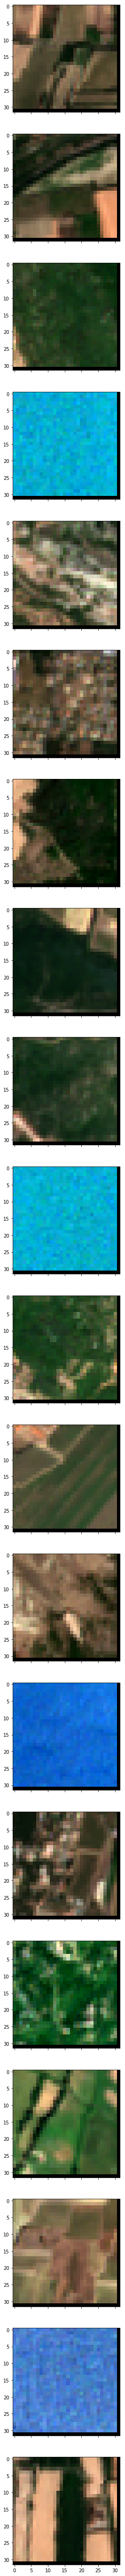

In [48]:
fig, axarr = plt.subplots(20, sharex=True,  figsize=(100,100))

for i in range(0,20):
    im=myImage(i,testRGB)
    axarr[i].imshow(im)

plt.show()


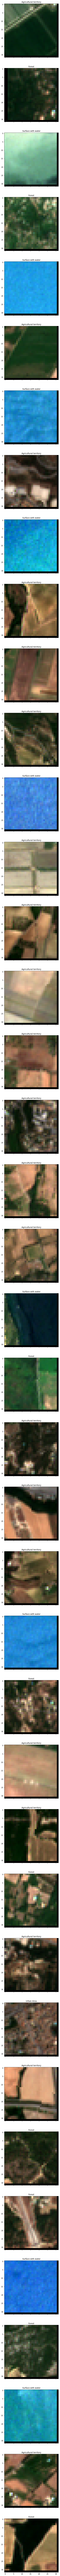

In [52]:
fig, axarr = plt.subplots(40, sharex=True,  figsize=(300,300))


for i in range(0,40):
    im=myImage(i,trainRGB)
    axarr[i].imshow(im)
    if (trainLabel[i,0]==1.):
        axarr[i].set_title("Urban Area")
    if (trainLabel[i,1]==1.):
        axarr[i].set_title("Agricultural territory")
    if (trainLabel[i,2]==1.):
        axarr[i].set_title("Forest")
    if (trainLabel[i,3]==1.):
        axarr[i].set_title("wetlands")
    if (trainLabel[i,4]==1.):
        axarr[i].set_title("Surface with water")

plt.show()

## 3. Stokage en .tif

Courte étude pour pouvoir stocker les images en .tif

In [7]:
# DEPRECEATED FOR THIS PROJECT (TAS)
#Fit the data into a 32*32 format and save it as a .tif file
#@Sukriti Paul

from PIL import Image
from skimage import data, io, filters
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

n=10 #number of images
for i in range (1,n+1):
    img=myImage(i,testRGB)
    #Subsection of the image
    print(img.shape)
    path=str(i)+'.tif'
    io.imsave('imageTIF/'+path,img)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


# Recherche pour la partie apprentissage 

## 1. Segmentation
Dispo avec Scikit Learn, méthode non supervisée de Felzenszwalb.

ON a lu beaucoup de litérature sur la segmentation d'image mais nous n'avons en fait pas les données nécessaire pour pouvoir faire un entrainement et de la segmentation d'image car nos images d'entrainement n'ont pas de calques. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

Felzenszwalb number of segments: 6
Felzenszwalb number of segments: 5
Felzenszwalb number of segments: 4
Felzenszwalb number of segments: 6
Felzenszwalb number of segments: 3
Felzenszwalb number of segments: 4
Felzenszwalb number of segments: 2
Felzenszwalb number of segments: 7
Felzenszwalb number of segments: 2
Felzenszwalb number of segments: 6
Felzenszwalb number of segments: 6
Felzenszwalb number of segments: 5
Felzenszwalb number of segments: 2
Felzenszwalb number of segments: 9
Felzenszwalb number of segments: 7
Felzenszwalb number of segments: 8
Felzenszwalb number of segments: 7
Felzenszwalb number of segments: 8
Felzenszwalb number of segments: 7
Felzenszwalb number of segments: 6


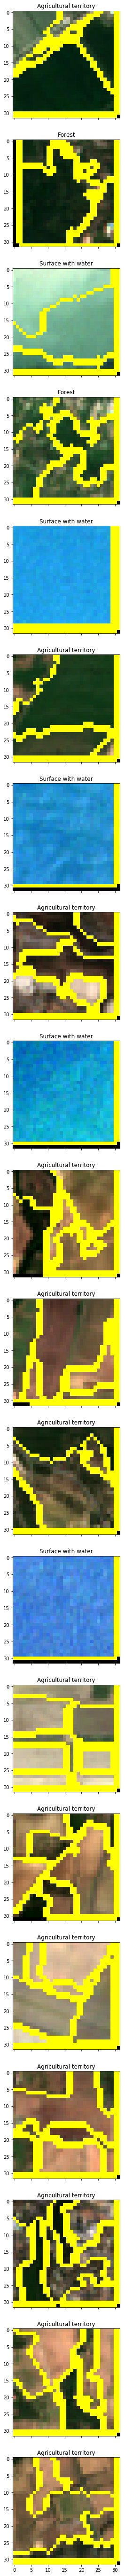

In [22]:
fig, ax = plt.subplots(20, sharex=True,  figsize=(100,100))

for i in range (0,20):
    img = myImage(i, trainRGB)
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
    #print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
    ax[i].imshow(mark_boundaries(img, segments_fz))
    if (trainLabel[i,0]==1.):
        ax[i].set_title("Urban Area")
    if (trainLabel[i,1]==1.):
        ax[i].set_title("Agricultural territory")
    if (trainLabel[i,2]==1.):
        ax[i].set_title("Forest")
    if (trainLabel[i,3]==1.):
        ax[i].set_title("wetlands")
    if (trainLabel[i,4]==1.):
        ax[i].set_title("Surface with water")

plt.show()



## 2. Etude de CNN

WORKFLOW de KERAS : 
1. Training Data 
2. Create Model (keras.layers())
3. Configure model (model.compile())
4. Train model (model.fit())
5. On trained Model, inject testing data then A OR B
  A. Evaluate model (model.evaluate()) => loss
  B. get predictions (model.predict()) => prediction


 POur la partie compile, il faut configurer :
 - Spécifier un Optimizer qui determine comment les poids sont mis à jour
 - Spécifier le type de la cost function or loss function
 - Spécifier la métrique a évaluer pendant le training et testing
 - Crer le graphe du model en utilisant le backend
 - ....
 
### RESULTATS :

#### a. Sur des données non traitées
**1er test :**
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 25s 6ms/step - loss: 1.3918 - acc: 0.3845 - val_loss: 1.3303 - val_acc: 0.3600

Train on 33600 samples, validate on 8400 samples
Epoch 1/1
33600/33600 [==============================] - 248s 7ms/step - loss: 0.9733 - acc: 0.6020 - val_loss: 0.7275 - val_acc: 0.6975

 ;Train on 171000 samples, validate on 42805 samples
Epoch 1/1
170950/171000 [============================>.] - ETA: 0s - loss: 0.7488 - acc: 0.7100

#### b. Sur des données traitées
avec **myImage** :
Train on 33600 samples, validate on 8400 samples
Epoch 1/1
33600/33600 [==============================] - 342s 10ms/step - loss: nan - acc: 0.0882 - val_loss: nan - val_acc: 0.0888

avec **myImage2**:
Train on 33600 samples, validate on 8400 samples
Epoch 1/1
33600/33600 [==============================] - 256s 8ms/step - loss: 0.9152 - acc: 0.6212 - val_loss: 0.7036 - val_acc: 0.7150



In [61]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

def createModel(inputshape,nClasses):
#See here for info : 
# https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/ 
# empilement de Conv layers puis de Max pooling layers.
# Dropout permet d'éviter l'overfitting
# A la fin, on a une fully connected layer (Dense) suivie d'une sopftmax layer
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same',activation='relu', input_shape=inputshape))
    # 32 filters/kernels with (3*3) size window.
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25)) # 0.25 : dropout ratio
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

# 6 Conv layze, 1 fully-connected layer


In [62]:
inputshape =(32,32,3)
nclasses = 5
mod = createModel(inputshape, nclasses)
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
__________

In [63]:
#KERAS WORKFLOW 
import keras

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
mod.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [53]:
# traitement des données 

for i in range (1, 43000):
    #print (trainRGBstar)
    #print (myImage(i,trainRGB))
    if i==100 or i==1000 or i==10000 or i==30000:
        print(i)
    trainRGB[i]=(myImage2(i, trainRGB))





100
1000
10000
30000


In [ ]:

for i in range (0, len(testRGB)-1):
    if i==100 or i==1000 or i==10000 or i==100000:
        print(i)
    testRGBstar.append(myImage2(i, trainRGB))

In [39]:
from sklearn.model_selection import train_test_split 

indices = np.random.randint(42000, size=42000)

# DONNEES NON TRAITEES
data = trainRGB[indices]
target = trainLabel[indices]
xtrain = data
ytrain = target
xtest = testRGB
ytest = testLabel
#xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=0.8)

In [64]:
from sklearn.model_selection import train_test_split 

#indices = np.random.randint(42000, size=42000)

# DONNEES TRAITEES
datastar = trainRGB[0:42000]
targetstar = trainLabel[0:42000]
#xtrainS = datastar
#ytrainS = targetstar
#xtestS = testRGBstar
#ytestS = testLabelstar
xtrainS, xtestS, ytrainS, ytestS =train_test_split(datastar, targetstar, train_size=0.8)


In [65]:
# 1.pour 5000*0.8 = 4000. Avec un batch de 50 il faut 80 passes

# 2. Taille données train : 171222. 
# Pour 171000, avec un batch size de 50 il faut 3420 passes.
history = mod.fit(xtrainS,ytrainS, batch_size=50, epochs=1, verbose=1,validation_data=(xtestS, ytestS))



Train on 33600 samples, validate on 8400 samples
Epoch 1/1
33600/33600 [==============================] - 248s 7ms/step - loss: 0.9733 - acc: 0.6020 - val_loss: 0.7275 - val_acc: 0.6975


In [41]:
mod.evaluate(xtest,ytest, verbose=1)


1000/1000 [==============================] - 2s 2ms/step


[1.330288942337036, 0.36]